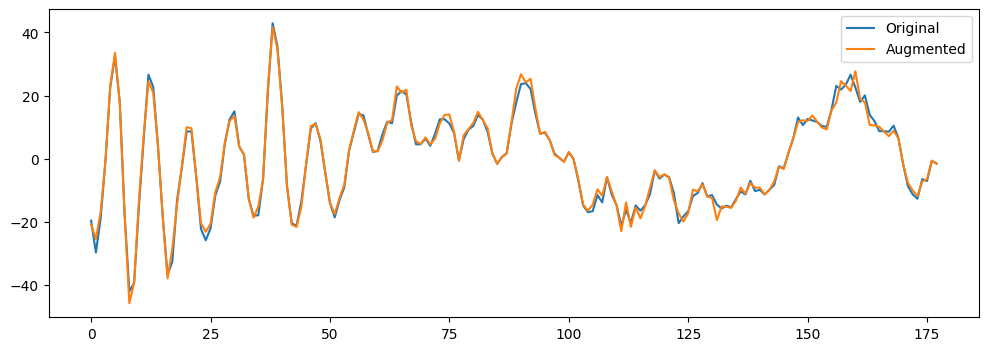

In [1]:
import torch, os
import numpy as np
import matplotlib.pyplot as plt

from DataLoader import TimeSeriesDataset
from torch.utils.data import Dataset
import torch.fft as fft
from Augmentation import augment_Data_FD, augment_Data_TD

# Datasets to check

In [11]:
datasets_list = ['SleepEEG', 'Epilepsy', 'FD-A', 'FD-B', 'HAR', 'Gesture', 'ecg', 'emg']
datasets = []
SleepEEG = TimeSeriesDataset(dataset=torch.load(os.path.join("datasets", "SleepEEG", "train.pt")), augment = True, jitter=True, scaling = False)
SleepEEGjitterscaled = TimeSeriesDataset(dataset=torch.load(os.path.join("datasets", "SleepEEG", "train.pt")), augment = True, jitter=True, scaling = True)
SleepEEGscaled = TimeSeriesDataset(dataset=torch.load(os.path.join("datasets", "SleepEEG", "train.pt")), augment = True, jitter=False, scaling = True)

# SleepEEG

## Jitter

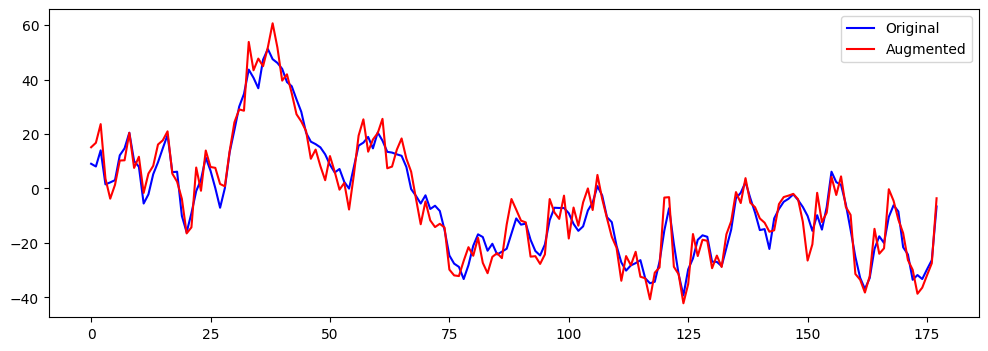

In [24]:
plt.figure(figsize=(12,4))
plt.plot(SleepEEG.X[0][0], label = "Original", color = 'b')
plt.plot(SleepEEG.X_aug[0][0], label = "Augmented", color = 'r')
plt.legend()
plt.show()

## Jitter and scaled

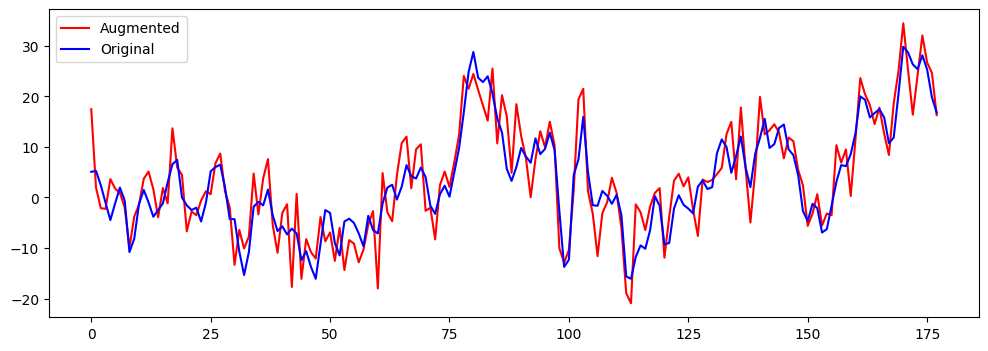

In [25]:
plt.figure(figsize=(12,4))
plt.plot(SleepEEGjitterscaled.X_aug[0][0], label = "Augmented", color = 'r')
plt.plot(SleepEEGjitterscaled.X[0][0], label = "Original", color = 'b')
plt.legend()
plt.show()

## Scaled

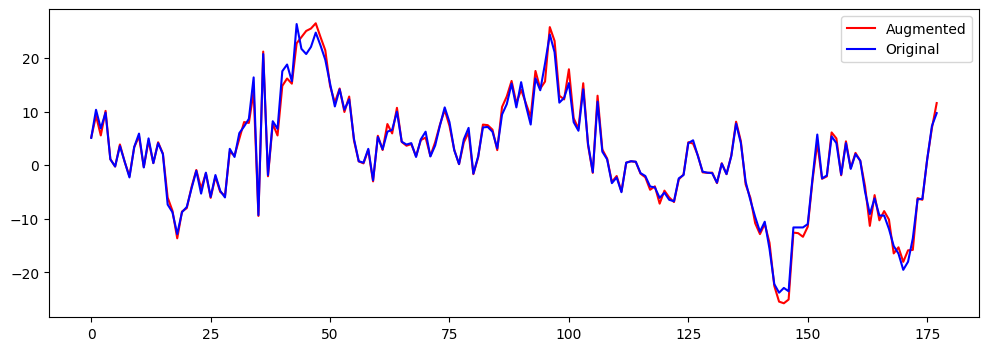

In [26]:
plt.figure(figsize=(12,4))
plt.plot(SleepEEGscaled.X_aug[0][0], label = "Augmented", color = 'r')
plt.plot(SleepEEGscaled.X[0][0], label = "Original", color = 'b')
plt.legend()
plt.show()